In [40]:
import pandas as pd
import os

In [2]:
data = pd.read_csv('./data/Monkeypox.csv')

In [3]:
data

,Test ID,Systemic Illness,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Home ownership,Age,Month of Birth,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
0,AA0021,NaN,0.0,0.0,1,1.0,1,0,1.0,0.0,5363690,9382,1,37,10,0,0.0,Negative
1,AA0022,Fever,1.0,1.0,0,1.0,1,0,0.0,1.0,5797376,7891,0,24,7,1,0.0,Positive
2,AA0023,Fever,1.0,0.0,1,1.0,0,0,0.0,1.0,4509503,9424,0,34,11,1,0.0,Positive
3,AA0024,NaN,0.0,1.0,0,0.0,0,1,1.0,1.0,4613306,4608,1,40,3,0,0.0,Positive
4,AA0025,Swollen Lymph Nodes,3.0,1.0,1,1.0,0,0,1.0,1.0,5423126,10668,1,36,8,0,0.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,AH33692,NaN,0.0,1.0,1,0.0,1,1,0.0,0.0,5774935,9537,1,56,1,0,1.0,Positive
24996,AH33693,Fever,1.0,0.0,1,1.0,0,1,1.0,1.0,4719924,7596,1,50,10,1,1.0,Positive
24997,AH33694,NaN,0.0,1.0,1,0.0,0,1,1.0,0.0,4254616,10949,0,24,12,1,0.0,Positive
24998,AH33695,Swollen Lymph Nodes,3.0,0.0,1,0.0,1,1,1.0,0.0,5440155,6006,1,56,9,1,0.0,Negative


In [4]:
data.shape

(25000, 18)

In [5]:
data.isnull().sum()

Test ID                              0
Systemic Illness                  6216
Encoded Systemic Illness             2
Rectal Pain                          3
Sore Throat                          0
Penile Oedema                        6
Oral Lesions                         4
Solitary Lesion                      0
Swollen Tonsils                      7
HIV Infection                        5
Red blood cells count                0
White blood cells count              0
Home ownership                       0
Age                                 36
Month of Birth                       0
Health Insurance                     0
Sexually Transmitted Infection       4
MPOX PCR Result                      0
dtype: int64

In [6]:
data.columns

Index(['Test ID', 'Systemic Illness', 'Encoded Systemic Illness',
       'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions',
       'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Red blood cells count', 'White blood cells count', 'Home ownership',
       'Age', 'Month of Birth', 'Health Insurance',
       'Sexually Transmitted Infection', 'MPOX PCR Result'],
      dtype='object')

# Data pre-processing

In [7]:
df = data.drop(['Test ID', 'Systemic Illness', 'White blood cells count', 'Red blood cells count', 'Home ownership', 'Health Insurance', 'Month of Birth', 'Age'], axis=1)

In [8]:
df

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MPOX PCR Result
0,0.0,0.0,1,1.0,1,0,1.0,0.0,0.0,Negative
1,1.0,1.0,0,1.0,1,0,0.0,1.0,0.0,Positive
2,1.0,0.0,1,1.0,0,0,0.0,1.0,0.0,Positive
3,0.0,1.0,0,0.0,0,1,1.0,1.0,0.0,Positive
4,3.0,1.0,1,1.0,0,0,1.0,1.0,0.0,Positive
...,...,...,...,...,...,...,...,...,...,...
24995,0.0,1.0,1,0.0,1,1,0.0,0.0,1.0,Positive
24996,1.0,0.0,1,1.0,0,1,1.0,1.0,1.0,Positive
24997,0.0,1.0,1,0.0,0,1,1.0,0.0,0.0,Positive
24998,3.0,0.0,1,0.0,1,1,1.0,0.0,0.0,Negative


In [9]:
# Replace NaN values in each column with the mode of that column
for column in df.columns:
    mode_value = df[column].mode()[0]  # Get the mode of the column
    df[column].fillna(mode_value, inplace=True)  # Replace NaN with the mode


/var/folders/__/mg4hkn8s2959m6wlht6zg4840000gp/T/ipykernel_94244/3623859602.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)  # Replace NaN with the mode
/var/folders/__/mg4hkn8s2959m6wlht6zg4840000gp/T/ipykernel_94244/3623859602.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

In [10]:
for column in df.columns:
    print(f"Unique values in column '{column}': {df[column].unique()}")

Unique values in column 'Encoded Systemic Illness': [0. 1. 3. 2.]
Unique values in column 'Rectal Pain': [0. 1.]
Unique values in column 'Sore Throat': [1 0]
Unique values in column 'Penile Oedema': [1. 0.]
Unique values in column 'Oral Lesions': ['1' '0' 'YES' 'No']
Unique values in column 'Solitary Lesion': [0 1]
Unique values in column 'Swollen Tonsils': [1. 0.]
Unique values in column 'HIV Infection': [0. 1.]
Unique values in column 'Sexually Transmitted Infection': [0. 1.]
Unique values in column 'MPOX PCR Result': ['Negative' 'Positive']


In [11]:
def convert_results(result):
    if result == 'Positive':
        return 1
    elif result == 'Negative':
        return 0
    else:
        return None

df['MPOX PCR Result'] = df['MPOX PCR Result'].map(convert_results)

In [12]:
df['Oral Lesions'] = df['Oral Lesions'].astype(str).str.strip().str.lower()
df['Oral Lesions'] = df['Oral Lesions'].replace({'no': 0, 'yes': 1})
df['Oral Lesions'] = df['Oral Lesions'].apply(lambda x: 1 if x in ['1', 'true'] else (0 if x in ['0', 'false'] else x))
mode_value = df['Oral Lesions'].mode()[0]
df['Oral Lesions'] = df['Oral Lesions'].fillna(mode_value)
print(df['Oral Lesions'].unique())

[1 0]


In [13]:
for variable in df.columns:
    print(df[variable].value_counts())
    print("~"*50)

Encoded Systemic Illness
1.0    6384
3.0    6252
0.0    6214
2.0    6150
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rectal Pain
0.0    12656
1.0    12344
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Sore Throat
1    12554
0    12446
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Penile Oedema
1.0    12614
0.0    12386
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Oral Lesions
0    12515
1    12485
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Solitary Lesion
1    12527
0    12473
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Swollen Tonsils
1.0    12535
0.0    12465
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
HIV Infection
1.0    12585
0.0    12415
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Sexually Transmitted Infection
0.0    12555


In [14]:
df.to_csv("./data/mo_processed.csv", index=False)

# EDA analysis

In [15]:
df.columns

Index(['Encoded Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MPOX PCR Result'],
      dtype='object')

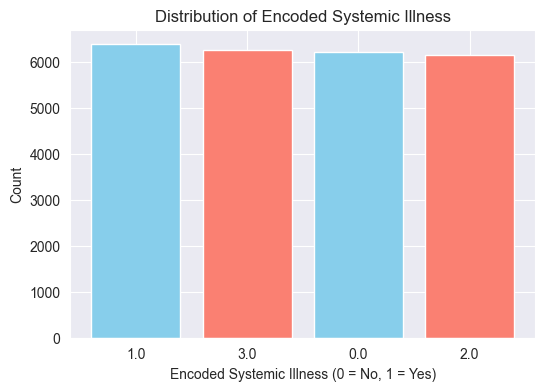

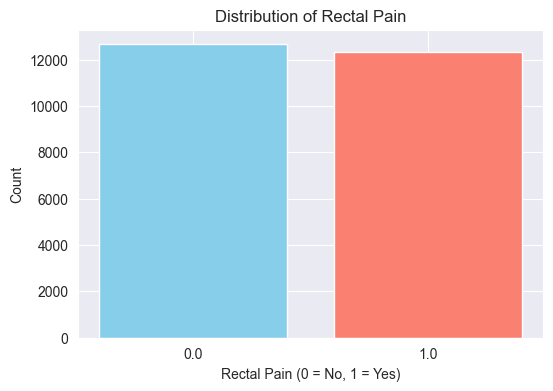

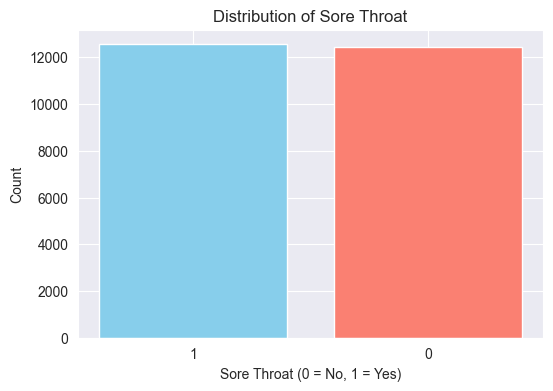

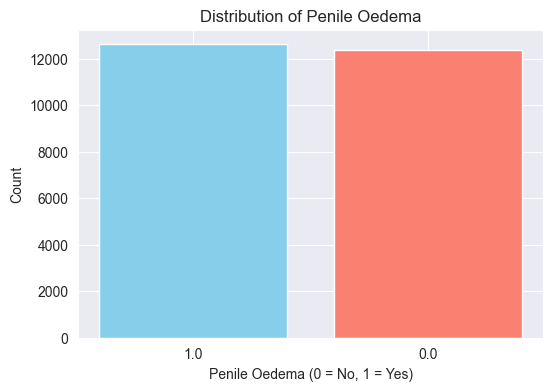

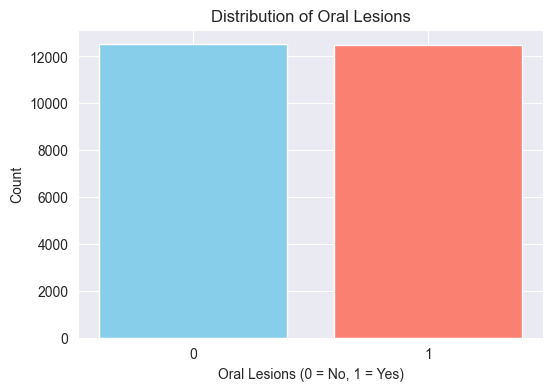

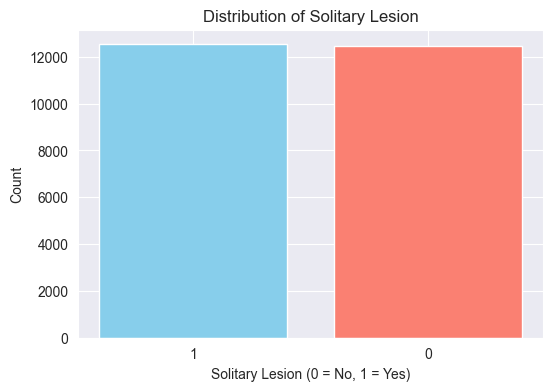

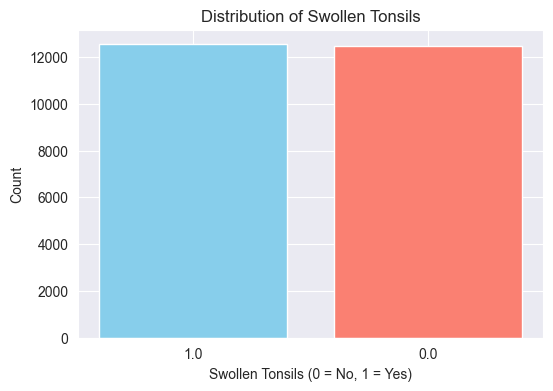

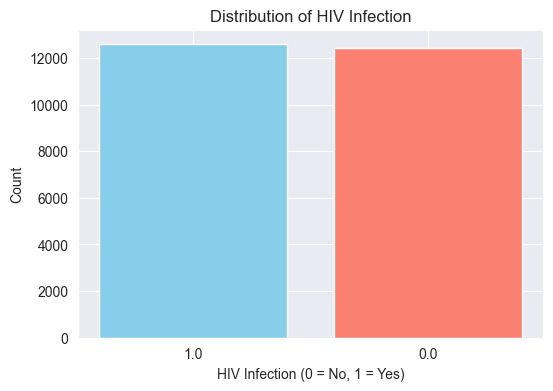

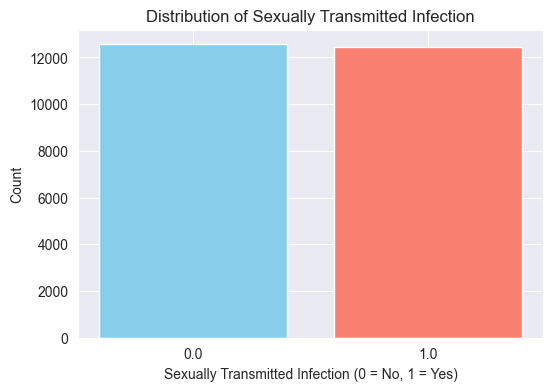

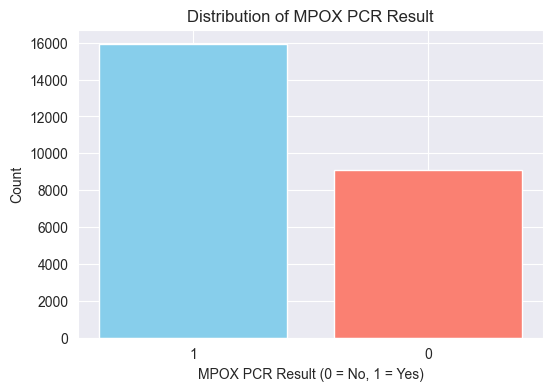

In [17]:
import matplotlib.pyplot as plt

# Define a function to create bar charts for each binary column
def plot_binary_distribution(df, column_name):
    value_counts = df[column_name].value_counts()
    plt.figure(figsize=(6, 4))
    plt.bar(value_counts.index.astype(str), value_counts.values, color=['skyblue', 'salmon'])
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(f'{column_name} (0 = No, 1 = Yes)')
    plt.ylabel('Count')
    plt.show()

# List of binary columns
binary_columns = ['Encoded Systemic Illness', 'Rectal Pain', 'Sore Throat',
                  'Penile Oedema', 'Oral Lesions', 'Solitary Lesion',
                  'Swollen Tonsils', 'HIV Infection',
                  'Sexually Transmitted Infection', 'MPOX PCR Result']

# Plot for each binary column in the DataFrame
for col in binary_columns:
    plot_binary_distribution(df, col)


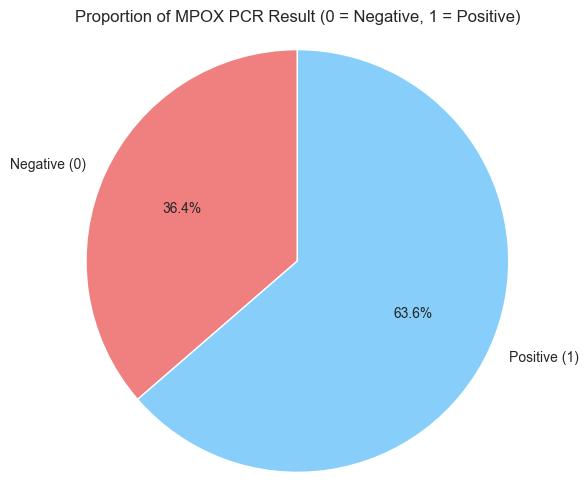

In [18]:
import matplotlib.pyplot as plt

# Sample data for MPOX PCR Result (using actual counts from df)
mpox_pcr_counts = df['MPOX PCR Result'].value_counts()

# Create a pie chart for MPOX PCR Result
labels = ['Negative (0)', 'Positive (1)']
sizes = [mpox_pcr_counts[0], mpox_pcr_counts[1]]  # Access counts with integers, not strings
colors = ['lightcoral', 'lightskyblue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of MPOX PCR Result (0 = Negative, 1 = Positive)')
plt.show()


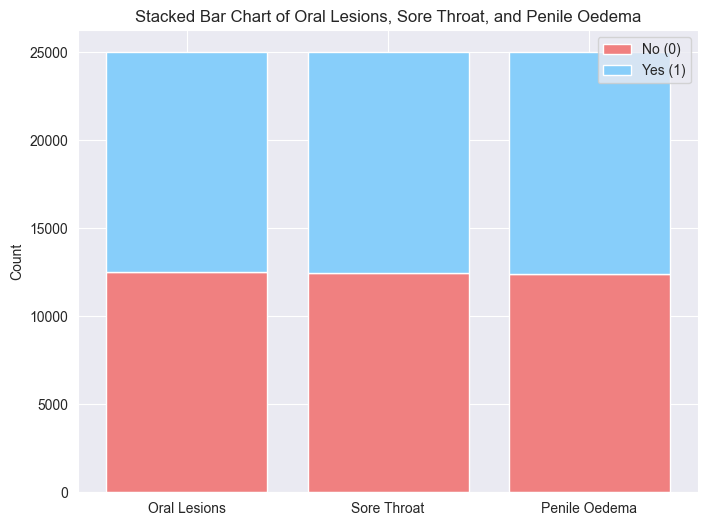

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Select the relevant columns
symptoms = ['Oral Lesions', 'Sore Throat', 'Penile Oedema']

# Calculate the counts for each binary variable (0 and 1) in each symptom
counts = {}
for symptom in symptoms:
    counts[symptom] = df[symptom].value_counts()

# Create a stacked bar chart
labels = ['0 (No)', '1 (Yes)']  # Binary categories
x = np.arange(len(symptoms))  # Label locations

# Extract the counts for each symptom for 0 and 1
no_counts = [counts[symptom][0] for symptom in symptoms]
yes_counts = [counts[symptom][1] for symptom in symptoms]

# Plotting the stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(x, no_counts, label='No (0)', color='lightcoral')
plt.bar(x, yes_counts, bottom=no_counts, label='Yes (1)', color='lightskyblue')

# Add labels and title
plt.xticks(x, symptoms)
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Oral Lesions, Sore Throat, and Penile Oedema')
plt.legend()

# Show the plot
plt.show()


# Models

In [24]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

X = df.drop(['MPOX PCR Result'], axis=1)
y = df['MPOX PCR Result']

# Encoding categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

In [25]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to balance the classes on the training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

#Print the shapes of the resulting datasets
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("y_test shape:", y_test.shape)

# Print the distribution of target classes in train and test sets
print("\nDistribution of classes in y_train_resampled:")
print(y_train_resampled.value_counts(normalize=True))

print("\nDistribution of classes in y_test:")
print(y_test.value_counts(normalize=True))


X_train_scaled shape: (22272, 9)
X_test_scaled shape: (7500, 9)
y_train_resampled shape: (22272,)
y_test shape: (7500,)

Distribution of classes in y_train_resampled:
MPOX PCR Result
1    0.5
0    0.5
Name: proportion, dtype: float64

Distribution of classes in y_test:
MPOX PCR Result
1    0.6364
0    0.3636
Name: proportion, dtype: float64


In [26]:
y_test

24874    0
22510    1
10408    1
20160    0
10281    1
        ..
20835    0
24374    1
13265    0
24009    0
4638     1
Name: MPOX PCR Result, Length: 7500, dtype: int64

In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbours': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Naïve Bayes': GaussianNB(),
    'XGB Classifier': XGBClassifier(random_state=42)
    #'Support Vector Machine': SVC(kernel='rbf', random_state=42)
}

results = {}
confusion_matrices = {}
roc_data = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_prob) if y_prob is not None else None,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

    # Predict probabilities
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:  # For models that do not support predict_proba, like SVM with a linear kernel
        y_prob = model.decision_function(X_test_scaled)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    # Store the ROC data
    roc_data[name] = {
        'fpr': fpr,
        'tpr': tpr,
        'auc': auc_score
    }

    # Store the confusion matrix in a dictionary
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

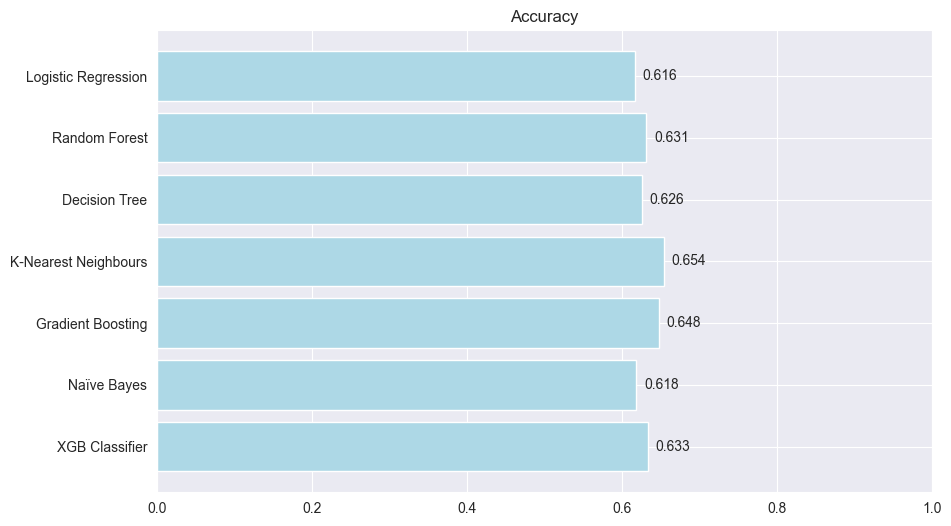

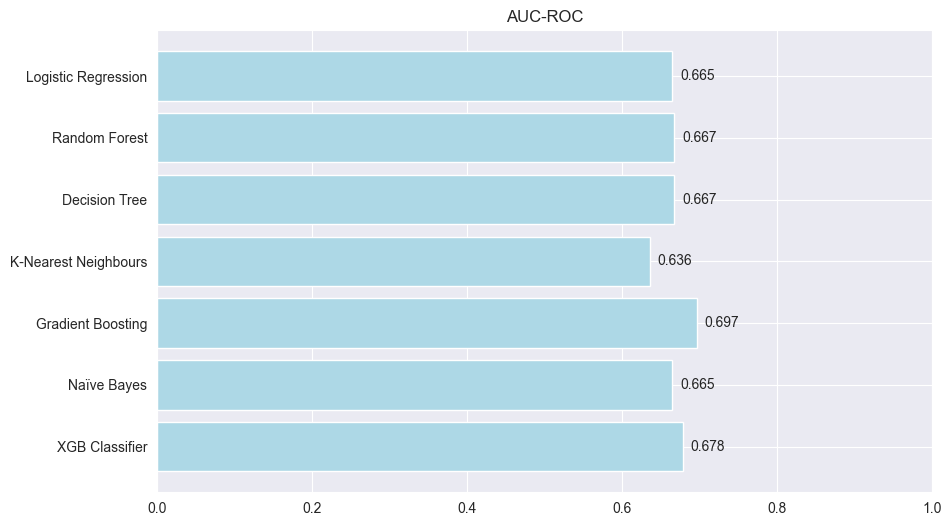

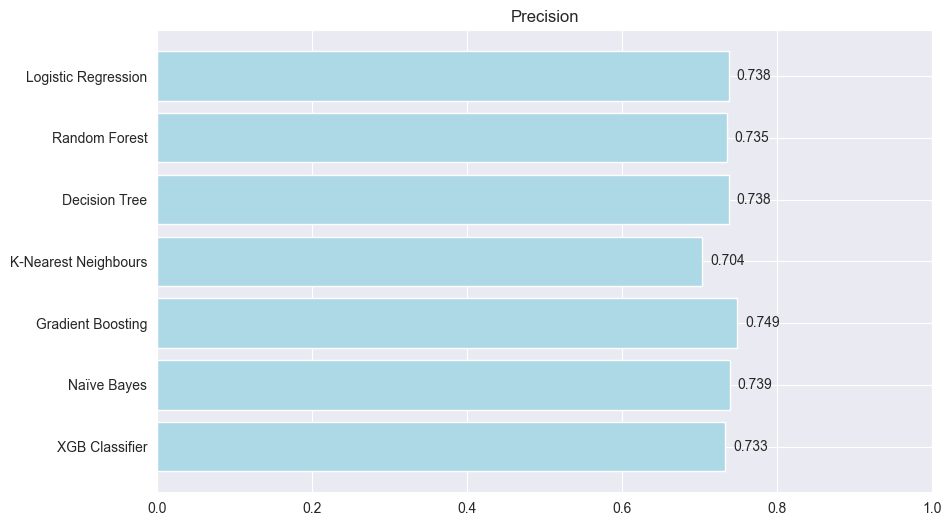

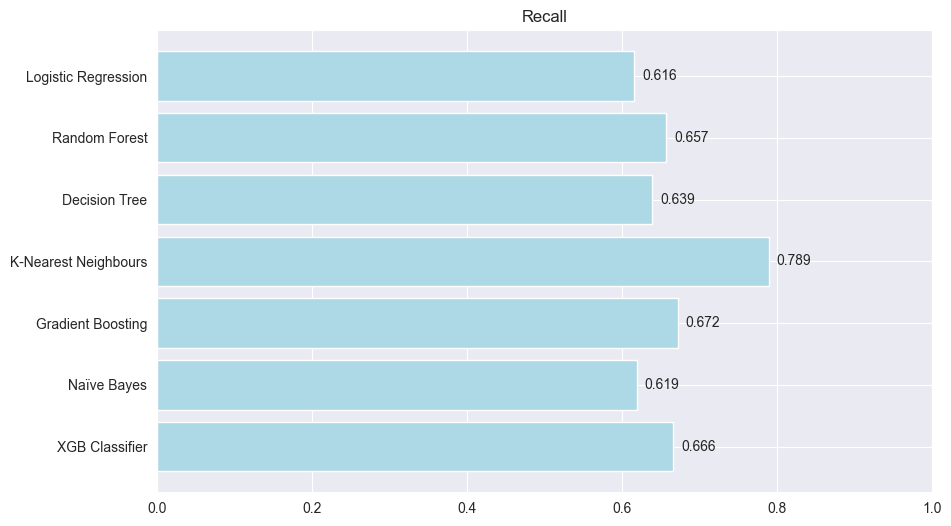

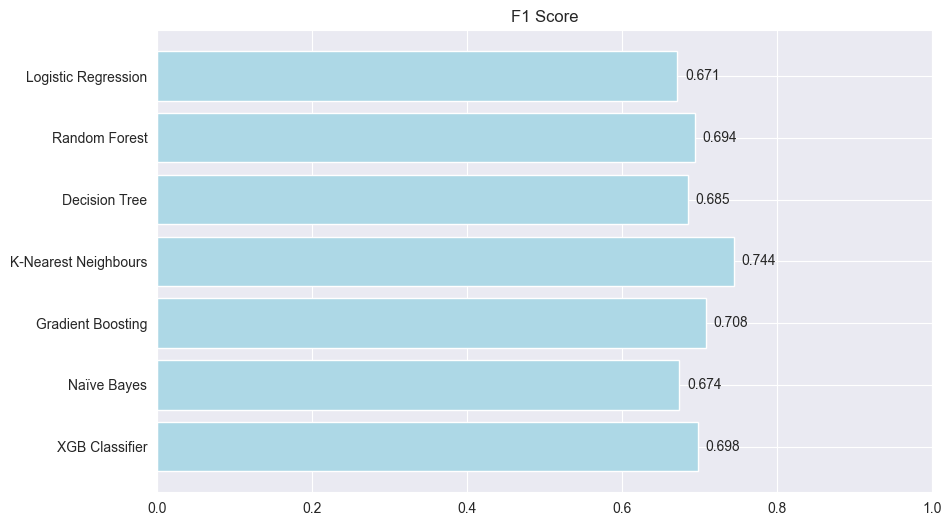

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Extract metrics
metrics = ['Accuracy', 'AUC-ROC', 'Precision', 'Recall', 'F1 Score']
n_metrics = len(metrics)

# Prepare data for plotting
model_names = list(results.keys())
scores = np.array([[results[model][metric] for metric in metrics] for model in model_names])

# Plot each metric in a separate figure
for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 6))
    bars = plt.barh(model_names, scores[:, i], color='lightblue')
    plt.title(metric)
    plt.xlim(0, 1)
    plt.gca().invert_yaxis()

    # Adding scores as text labels on each bar
    for bar, score in zip(bars, scores[:, i]):
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{score:.3f}', va='center')

    plt.savefig(os.path.join('plots', f'Metrix-{metric}'))
    plt.show()


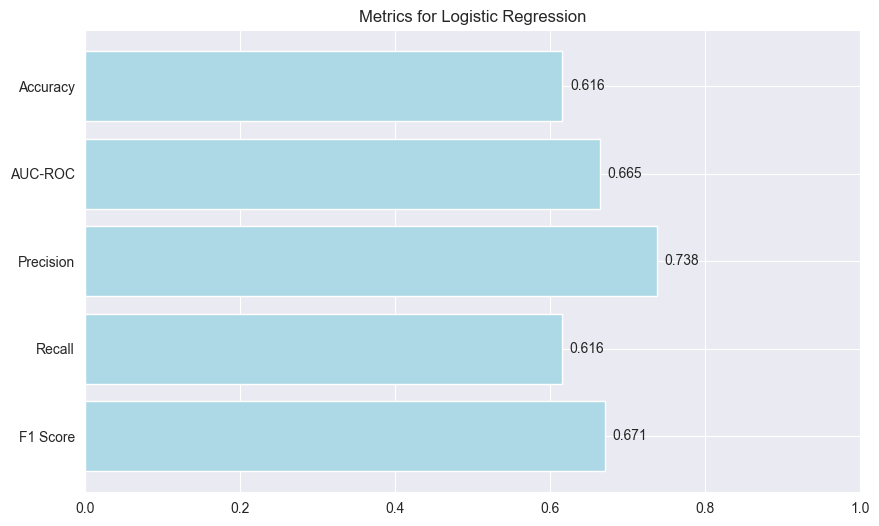

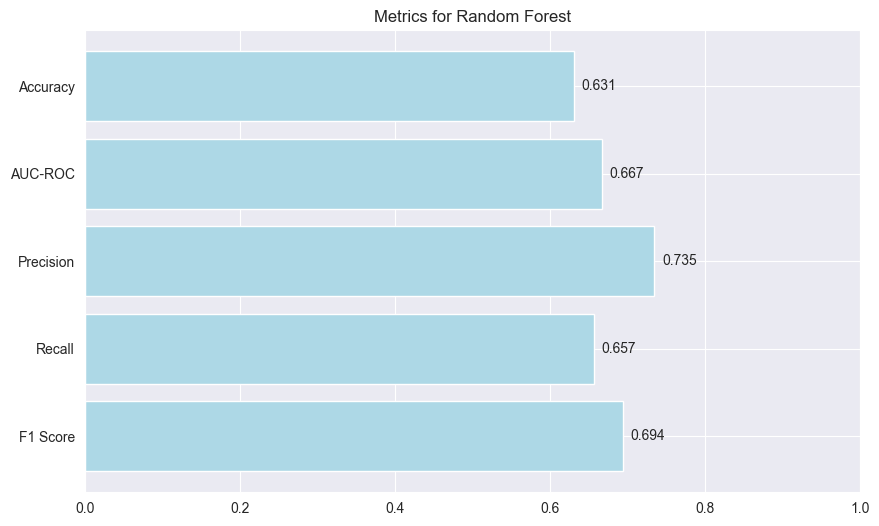

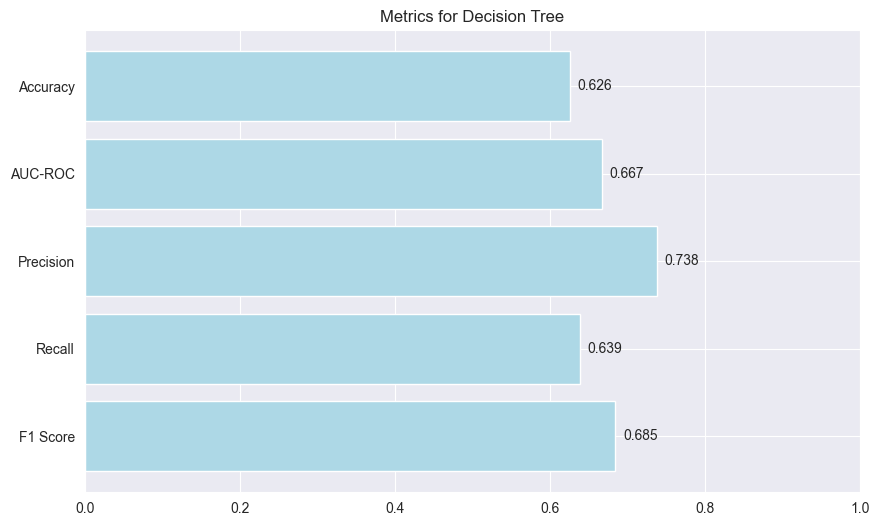

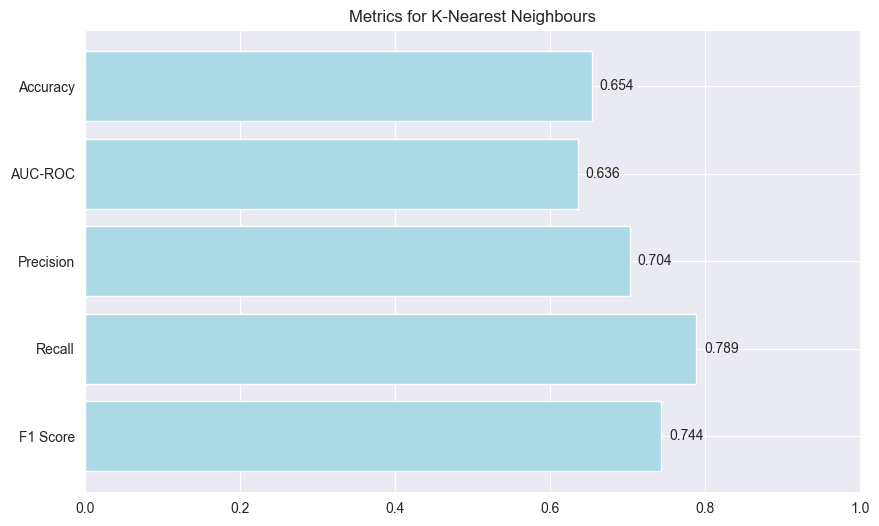

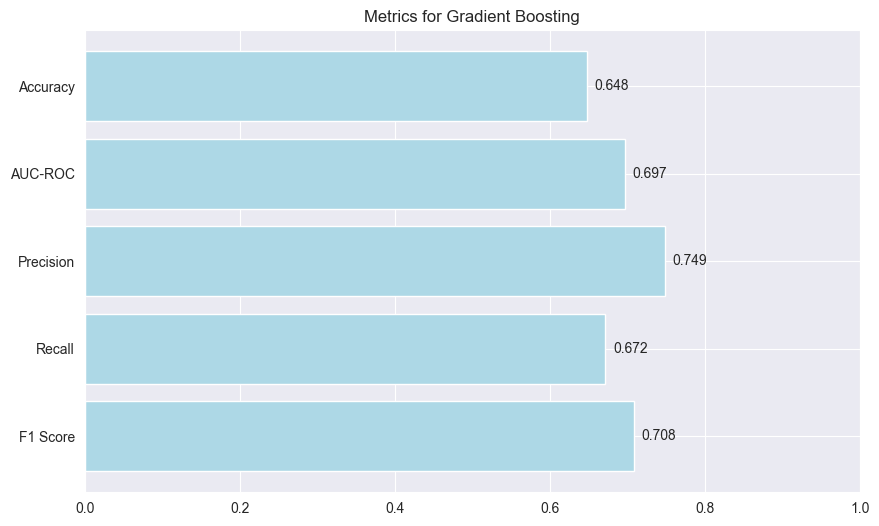

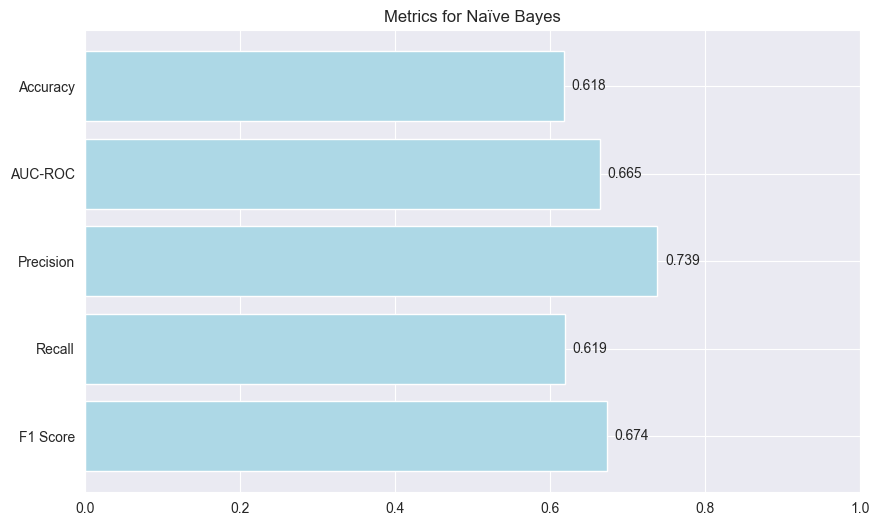

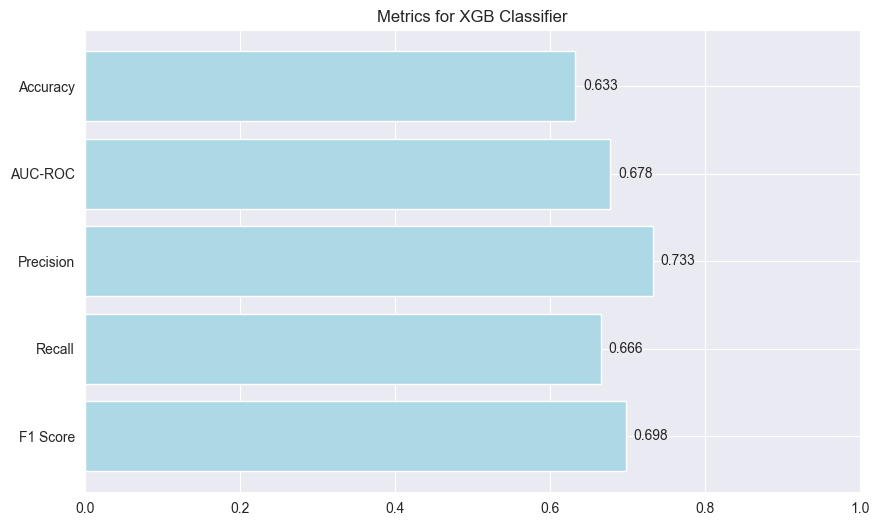

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Extract metrics
metrics = ['Accuracy', 'AUC-ROC', 'Precision', 'Recall', 'F1 Score']

# Prepare data for plotting
model_names = list(results.keys())
scores = np.array([[results[model][metric] for metric in metrics] for model in model_names])

# Plot each algorithm's metrics in a separate figure
for i, model_name in enumerate(model_names):
    plt.figure(figsize=(10, 6))
    bars = plt.barh(metrics, scores[i], color='lightblue')
    plt.title(f'Metrics for {model_name}')
    plt.xlim(0, 1)
    plt.gca().invert_yaxis()

    # Adding scores as text labels on each bar
    for bar, score in zip(bars, scores[i]):
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{score:.3f}', va='center')

    plt.savefig(os.path.join('plots', f'Model-Metrix-for-{model_name}'))
    plt.show()


In [31]:
metrics = ['Accuracy', 'AUC-ROC', 'Precision', 'Recall', 'F1 Score']

model_names = list(results.keys())
scores = np.array([[results[model][metric] for metric in metrics] for model in model_names])

df_results = pd.DataFrame(scores, index=model_names, columns=metrics)

deep_learning_results = {
    'Accuracy': '0.834560',
    'AUC-ROC': '0.674977',
    'Precision': '0.245348',
    'Recall': '0.204519',
    'F1 Score': '0.223080'
}

df_deep_learning = pd.DataFrame([deep_learning_results], index=['MLPClassifier'])
df_results = pd.concat([df_results, df_deep_learning])

df_results

,Accuracy,AUC-ROC,Precision,Recall,F1 Score
Logistic Regression,0.616267,0.664992,0.738006,0.615546,0.671236
Random Forest,0.631067,0.667413,0.735005,0.657239,0.69395
Decision Tree,0.625733,0.667204,0.737899,0.638802,0.684784
K-Nearest Neighbours,0.654133,0.635958,0.703531,0.789022,0.743828
Gradient Boosting,0.647733,0.696563,0.748774,0.671904,0.70826
Naïve Bayes,0.6184,0.664802,0.738815,0.619317,0.673809
XGB Classifier,0.6332,0.678172,0.733057,0.666248,0.698057
MLPClassifier,0.834560,0.674977,0.245348,0.204519,0.223080


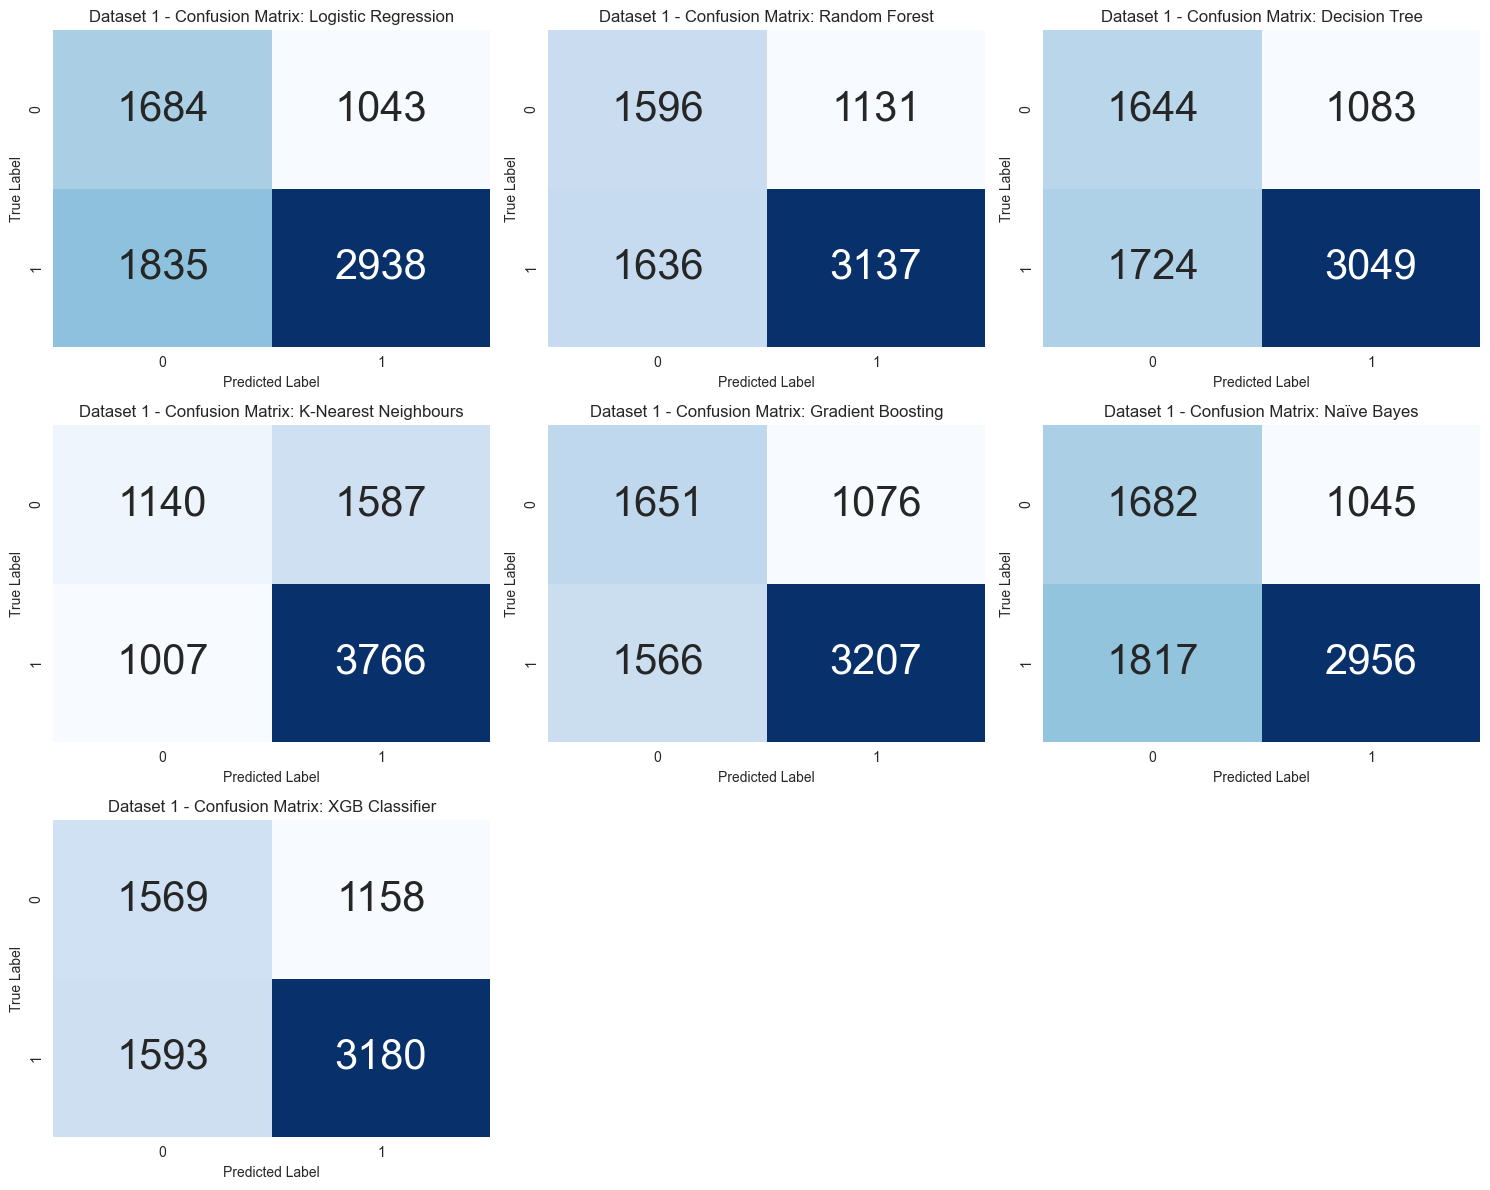

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the plot size for all confusion matrices
plt.figure(figsize=(15, 12))

# Plot each confusion matrix
for i, (name, cm) in enumerate(confusion_matrices.items()):
    plt.subplot(3, 3, i + 1)  # Adjust the grid size based on the number of models
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 30})
    plt.title(f'Dataset 1 - Confusion Matrix: {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.savefig(os.path.join('plots', 'confusion-matrixes.png'))
plt.show()

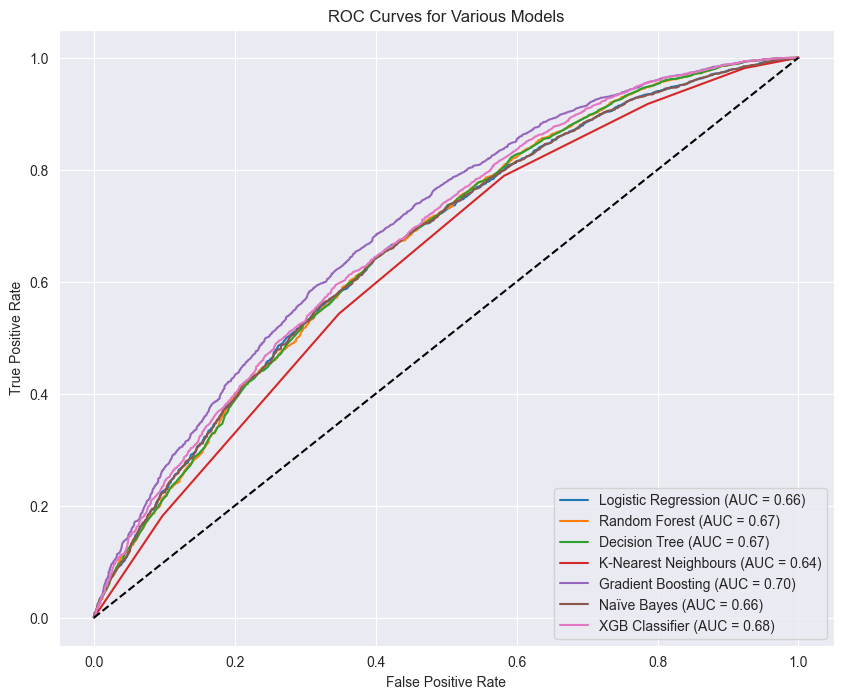

In [38]:
import os
import matplotlib.pyplot as plt

# Initialize the plot
plt.figure(figsize=(10, 8))

# Plot each ROC curve
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f'{name} (AUC = {data["auc"]:.2f})')

# Plot the 45-degree line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Customize the plot
plt.title('ROC Curves for Various Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.savefig(os.path.join('plots', 'auc-roc.png'))

# Show the plot
plt.show()